In [27]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [28]:
# import json
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # --- 1. Load Data ---
# # Load Final Test JSONs
# with open('/Users/v/Desktop/Fall 2025 Syllabus/CSCI 331 Project/CSCI-331-04-Group-10/data/results/final_test_results.json', 'r') as f:
#     unet_final = json.load(f)

# with open('/Users/v/Desktop/Fall 2025 Syllabus/CSCI 331 Project/CSCI-331-04-Group-10/data/results/final_maskrcnn_test_results.json', 'r') as f:
#     mrcnn_final = json.load(f)

# # Load K-Fold CSVs
# unet_kfold = pd.read_csv('/Users/v/Desktop/Fall 2025 Syllabus/CSCI 331 Project/CSCI-331-04-Group-10/data/results/kfold_results.csv')
# mrcnn_kfold = pd.read_csv('/Users/v/Desktop/Fall 2025 Syllabus/CSCI 331 Project/CSCI-331-04-Group-10/data/results/maskrcnn_kfold_results.csv')

# # Load Tuning CSVs
# unet_tuning = pd.read_csv('/Users/v/Desktop/Fall 2025 Syllabus/CSCI 331 Project/CSCI-331-04-Group-10/data/results/hyperparameter_results.csv')
# mrcnn_tuning = pd.read_csv('/Users/v/Desktop/Fall 2025 Syllabus/CSCI 331 Project/CSCI-331-04-Group-10/data/results/maskrcnn_tuning_results.csv')

# # --- 2. Create Plot Layout ---
# fig, axes = plt.subplots(2, 2, figsize=(15, 12))
# fig.suptitle('Model Comparison: U-Net vs. Mask R-CNN', fontsize=16, fontweight='bold')

# # --- PLOT 1: Bar Chart (Final Metrics) ---
# ax1 = axes[0, 0]
# metrics = ['iou', 'f1_score', 'precision', 'recall', 'accuracy']
# labels = [m.replace('_', ' ').title().replace('Iou', 'IoU') for m in metrics]

# unet_scores = [unet_final.get(m, 0) for m in metrics]
# mrcnn_scores = [mrcnn_final.get(m, 0) for m in metrics]

# x = np.arange(len(labels))
# width = 0.35

# rects1 = ax1.bar(x - width/2, unet_scores, width, label='U-Net', color='royalblue')
# rects2 = ax1.bar(x + width/2, mrcnn_scores, width, label='Mask R-CNN', color='tomato')

# ax1.set_ylabel('Score')
# ax1.set_title('Final Test Set Comparison')
# ax1.set_xticks(x)
# ax1.set_xticklabels(labels)
# ax1.set_ylim(0, 1.1)
# ax1.legend()
# ax1.grid(axis='y', linestyle='--', alpha=0.7)

# # Add value labels
# def autolabel(rects, ax):
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate(f'{height:.2f}',
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),
#                     textcoords="offset points",
#                     ha='center', va='bottom')

# autolabel(rects1, ax1)
# autolabel(rects2, ax1)

# # --- PLOT 2: Box Plot (K-Fold Stability) ---
# ax2 = axes[0, 1]
# data_to_plot = [unet_kfold['iou'], mrcnn_kfold['iou']]
# parts = ax2.boxplot(data_to_plot, patch_artist=True, labels=['U-Net', 'Mask R-CNN'])

# colors = ['royalblue', 'tomato']
# for patch, color in zip(parts['boxes'], colors):
#     patch.set_facecolor(color)
#     patch.set_alpha(0.6)

# ax2.set_title('K-Fold Stability (IoU Spread)')
# ax2.set_ylabel('IoU Score')
# ax2.grid(axis='y', linestyle='--', alpha=0.7)

# # --- PLOT 3: Scatter/Line Plot (Hyperparameter Sensitivity) ---
# ax3 = axes[1, 0]

# # Aggregate mean F1 per learning rate
# unet_lr_grouped = unet_tuning.groupby('learning_rate')['f1_score'].mean()
# mrcnn_lr_grouped = mrcnn_tuning.groupby('learning_rate')['f1_score'].mean()

# ax3.plot(unet_lr_grouped.index, unet_lr_grouped.values, marker='o', label='U-Net', color='royalblue', linewidth=2)
# ax3.plot(mrcnn_lr_grouped.index, mrcnn_lr_grouped.values, marker='s', label='Mask R-CNN', color='tomato', linewidth=2)

# ax3.set_title('Hyperparameter Sensitivity (F1 vs LR)')
# ax3.set_xlabel('Learning Rate')
# ax3.set_ylabel('Mean F1 Score')
# ax3.set_xscale('log')
# ax3.legend()
# ax3.grid(True, linestyle='--', alpha=0.7)

# # --- PLOT 4: Summary Text ---
# ax4 = axes[1, 1]
# ax4.axis('off')
# summary_text = (
#     "Key Takeaways:\n\n"
#     f"1. U-Net outperforms Mask R-CNN in IoU\n   ({unet_final['iou']:.2f} vs {mrcnn_final.get('iou', 0):.2f}).\n\n"
#     "2. U-Net shows higher stability (tighter boxplot).\n\n"
#     "3. Mask R-CNN is more sensitive to learning rate changes."
# )
# ax4.text(0.1, 0.5, summary_text, fontsize=12, va='center', wrap=True)

# plt.tight_layout()
# plt.savefig('model_comparison_matplotlib.png', dpi=300)
# plt.show()

In [29]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# --- CONFIGURATION ---
RESULTS_DIR = "/Users/v/Desktop/Fall 2025 Syllabus/CSCI 331 Project/CSCI-331-04-Group-10/data/results/"

def get_path(filename):
    """Helper to join the directory with the filename"""
    return os.path.join(RESULTS_DIR, filename)

# --- Load Data ---
# Final Test Results
with open(get_path('final_test_results.json'), 'r') as f:
    unet_final = json.load(f)
with open(get_path('final_maskrcnn_test_results.json'), 'r') as f:
    mrcnn_final = json.load(f)

# K-Fold CSVs
unet_kfold = pd.read_csv(get_path('kfold_results.csv'))
mrcnn_kfold = pd.read_csv(get_path('maskrcnn_kfold_results.csv'))

# Tuning CSVs
unet_tuning = pd.read_csv(get_path('hyperparameter_results.csv'))
mrcnn_tuning = pd.read_csv(get_path('maskrcnn_tuning_results.csv'))

print("Data loaded successfully.")

Data loaded successfully.


Plot 1 - Final Metrics Comparison (Bar Chart)

Saved: /Users/v/Desktop/Fall 2025 Syllabus/CSCI 331 Project/CSCI-331-04-Group-10/data/results/final_metrics_comparison.png


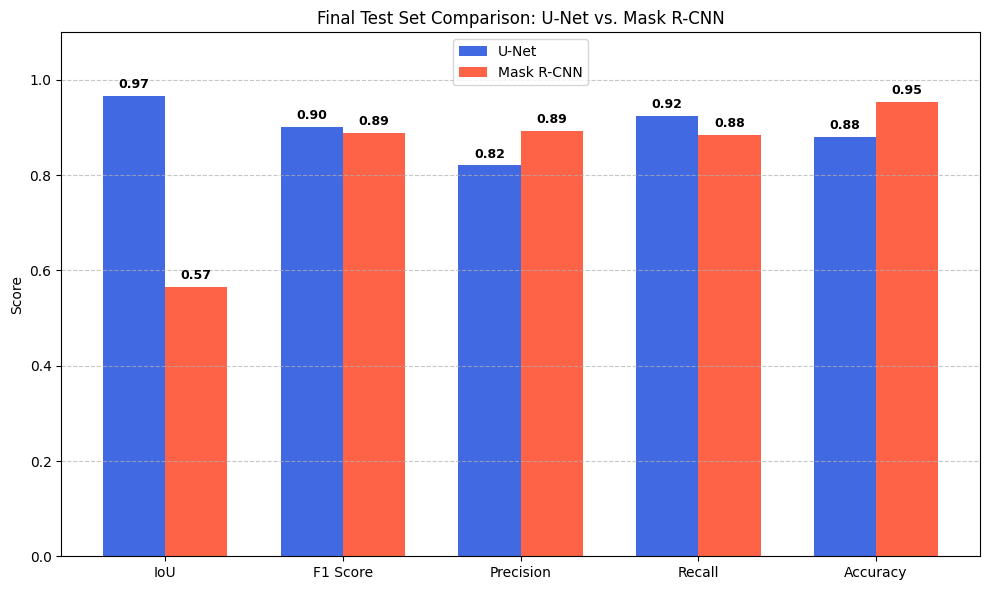

In [30]:
# --- PLOT 1: Final Metrics Comparison ---
plt.figure(figsize=(10, 6))

metrics = ['iou', 'f1_score', 'precision', 'recall', 'accuracy']
labels = [m.replace('_', ' ').title().replace('Iou', 'IoU') for m in metrics]

unet_scores = [unet_final.get(m, 0) for m in metrics]
mrcnn_scores = [mrcnn_final.get(m, 0) for m in metrics]

x = np.arange(len(labels))
width = 0.35

# Create bars
plt.bar(x - width/2, unet_scores, width, label='U-Net', color='royalblue')
plt.bar(x + width/2, mrcnn_scores, width, label='Mask R-CNN', color='tomato')

# Formatting
plt.ylabel('Score')
plt.title('Final Test Set Comparison: U-Net vs. Mask R-CNN')
plt.xticks(x, labels)
plt.ylim(0, 1.1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add numeric labels on bars
for i, v in enumerate(unet_scores):
    plt.text(i - width/2, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
for i, v in enumerate(mrcnn_scores):
    plt.text(i + width/2, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()

# Save & Show
save_path = get_path('final_metrics_comparison.png')
plt.savefig(save_path, dpi=300)
print(f"Saved: {save_path}")
plt.show()

Plot 2 - K-Fold Stability (Box Plot)
This shows how consistent (stable) each model was during cross-validation.

Saved: /Users/v/Desktop/Fall 2025 Syllabus/CSCI 331 Project/CSCI-331-04-Group-10/data/results/kfold_stability_comparison.png


/var/folders/d6/76g255sx4_76hwjk3dnqzm940000gn/T/ipykernel_68728/2734867172.py:5: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



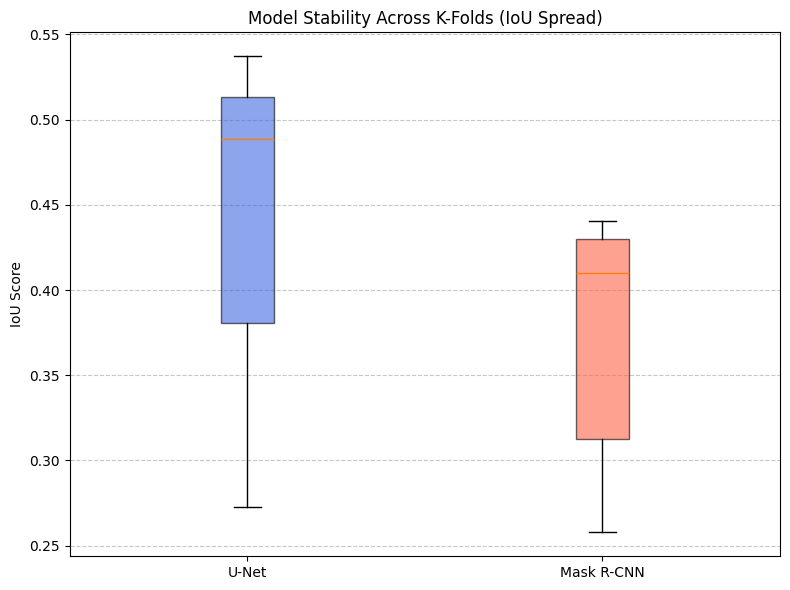

In [31]:
# --- PLOT 2: K-Fold Stability Comparison ---
plt.figure(figsize=(8, 6))

data_to_plot = [unet_kfold['iou'], mrcnn_kfold['iou']]
parts = plt.boxplot(data_to_plot, patch_artist=True, labels=['U-Net', 'Mask R-CNN'])

# Colors for boxes
colors = ['royalblue', 'tomato']
for patch, color in zip(parts['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

# Formatting
plt.title('Model Stability Across K-Folds (IoU Spread)')
plt.ylabel('IoU Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save & Show
save_path = get_path('kfold_stability_comparison.png')
plt.savefig(save_path, dpi=300)
print(f"Saved: {save_path}")
plt.show()

Hyperparameter Sensitivity (Line Plot)
This shows how robust each model is to changes in the learning rate.

Saved: /Users/v/Desktop/Fall 2025 Syllabus/CSCI 331 Project/CSCI-331-04-Group-10/data/results/hyperparameter_sensitivity_comparison.png


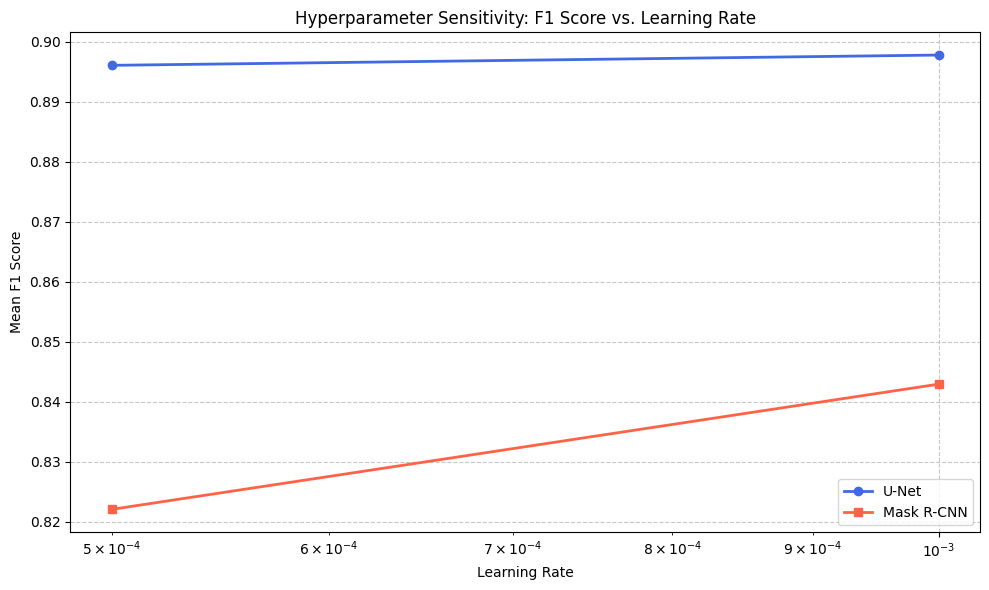

In [32]:
# --- PLOT 3: Hyperparameter Sensitivity ---
plt.figure(figsize=(10, 6))

# Aggregate mean F1 per learning rate
unet_lr_grouped = unet_tuning.groupby('learning_rate')['f1_score'].mean()
mrcnn_lr_grouped = mrcnn_tuning.groupby('learning_rate')['f1_score'].mean()

# Create lines
plt.plot(unet_lr_grouped.index, unet_lr_grouped.values, marker='o', label='U-Net', color='royalblue', linewidth=2)
plt.plot(mrcnn_lr_grouped.index, mrcnn_lr_grouped.values, marker='s', label='Mask R-CNN', color='tomato', linewidth=2)

# Formatting
plt.title('Hyperparameter Sensitivity: F1 Score vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Mean F1 Score')
plt.xscale('log') # Log scale is best for learning rates
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

# Save & Show
save_path = get_path('hyperparameter_sensitivity_comparison.png')
plt.savefig(save_path, dpi=300)
print(f"Saved: {save_path}")
plt.show()